In [39]:
# IMPORT LIBRARIES
# ===============================
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
import warnings
warnings.filterwarnings("ignore")

from sklearn.metrics import (
    accuracy_score,
    roc_auc_score,
    precision_score,
    recall_score,
    f1_score,
    matthews_corrcoef,
    confusion_matrix,
    classification_report
)


In [40]:
df= pd.read_csv("C:/Users/LENOVO/OneDrive - wilp.bits-pilani.ac.in/Documents/Sem-1/Machine_learning_handout/assignment_2/raw_merged_heart_dataset.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalachh,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2176,60,1,0,140,207,0,0,138,1,1.9,2,1,3,0
2177,46,1,0,140,311,0,1,120,1,1.8,1,2,3,0
2178,59,1,3,134,204,0,1,162,0,0.8,2,2,2,0
2179,54,1,1,154,232,0,0,164,0,0.0,2,1,2,0


In [41]:
# Identify categorical columns (in this case, we assume 'sex', 'cp', 'restecg', 'exang', 'slope', 'ca', 'thal' are categorical)
categorical_columns = ['sex', 'cp', 'restecg', 'exang', 'slope', 'ca', 'thal']

# Apply Label Encoding to categorical columns
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])  # Encode categories
    label_encoders[col] = le

In [42]:
# CHECK SHAPE
# ===============================
print("Shape:", df.shape)
print("Columns:", df.columns)

# ===============================
# 3. DATA CLEANING
# ==========================================

# Replace '?' with NaN (if exists)
df.replace("?", np.nan, inplace=True)

# Convert columns to numeric
for col in df.columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Handle missing values
df.fillna(df.median(), inplace=True)

print("Missing values after cleaning:\n", df.isnull().sum())

# ===============================
# ENCODE CATEGORICAL VARIABLES
# ===============================
# (Most columns are already numeric)
categorical_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

encoder = LabelEncoder()
for col in categorical_cols:
    df[col] = encoder.fit_transform(df[col])

Shape: (2181, 14)
Columns: Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')
Missing values after cleaning:
 age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalachh    0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [43]:
# Features and target
X = df.drop('target', axis=1)  # All columns except 'target'
y = df['target']  # The target variable

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling (important for KNN, Logistic Regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [44]:
# 7. DEFINE MODELS
# ==========================================
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "KNN": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

In [45]:
#1. Logistic Regression

# List to store the models and their metrics
models = []

# Logistic Regression
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_scaled, y_train)
y_pred_logreg = logreg.predict(X_test_scaled)
logreg_metrics = {
    'Model': 'Logistic Regression',
    'Accuracy': accuracy_score(y_test, y_pred_logreg),
    'AUC': roc_auc_score(y_test, y_pred_logreg),
    'Precision': precision_score(y_test, y_pred_logreg),
    'Recall': recall_score(y_test, y_pred_logreg),
    'F1 Score': f1_score(y_test, y_pred_logreg),
    'MCC': matthews_corrcoef(y_test, y_pred_logreg)
}
models.append(logreg_metrics)

# Decision Tree Classifier
dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(X_train, y_train)
y_pred_dtree = dtree.predict(X_test)
dtree_metrics = {
    'Model': 'Decision Tree',
    'Accuracy': accuracy_score(y_test, y_pred_dtree),
    'AUC': roc_auc_score(y_test, y_pred_dtree),
    'Precision': precision_score(y_test, y_pred_dtree),
    'Recall': recall_score(y_test, y_pred_dtree),
    'F1 Score': f1_score(y_test, y_pred_dtree),
    'MCC': matthews_corrcoef(y_test, y_pred_dtree)
}
models.append(dtree_metrics)

# K-Nearest Neighbor Classifier
knn = KNeighborsClassifier()
knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)
knn_metrics = {
    'Model': 'KNN',
    'Accuracy': accuracy_score(y_test, y_pred_knn),
    'AUC': roc_auc_score(y_test, y_pred_knn),
    'Precision': precision_score(y_test, y_pred_knn),
    'Recall': recall_score(y_test, y_pred_knn),
    'F1 Score': f1_score(y_test, y_pred_knn),
    'MCC': matthews_corrcoef(y_test, y_pred_knn)
}
models.append(knn_metrics)

# Naive Bayes Classifier
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)
nb_metrics = {
    'Model': 'Naive Bayes',
    'Accuracy': accuracy_score(y_test, y_pred_nb),
    'AUC': roc_auc_score(y_test, y_pred_nb),
    'Precision': precision_score(y_test, y_pred_nb),
    'Recall': recall_score(y_test, y_pred_nb),
    'F1 Score': f1_score(y_test, y_pred_nb),
    'MCC': matthews_corrcoef(y_test, y_pred_nb)
}
models.append(nb_metrics)

# Random Forest Classifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
rf_metrics = {
    'Model': 'Random Forest',
    'Accuracy': accuracy_score(y_test, y_pred_rf),
    'AUC': roc_auc_score(y_test, y_pred_rf),
    'Precision': precision_score(y_test, y_pred_rf),
    'Recall': recall_score(y_test, y_pred_rf),
    'F1 Score': f1_score(y_test, y_pred_rf),
    'MCC': matthews_corrcoef(y_test, y_pred_rf)
}
models.append(rf_metrics)



# XGBoost Classifier
xgb_model = xgb.XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
xgb_metrics = {
    'Model': 'XGBoost',
    'Accuracy': accuracy_score(y_test, y_pred_xgb),
    'AUC': roc_auc_score(y_test, y_pred_xgb),
    'Precision': precision_score(y_test, y_pred_xgb),
    'Recall': recall_score(y_test, y_pred_xgb),
    'F1 Score': f1_score(y_test, y_pred_xgb),
    'MCC': matthews_corrcoef(y_test, y_pred_xgb)
}
models.append(xgb_metrics)

# Convert to DataFrame for better visualization
metrics_df = pd.DataFrame(models)

# Print the evaluation metrics for all models
print(metrics_df)

                 Model  Accuracy       AUC  Precision    Recall  F1 Score  \
0  Logistic Regression  0.725400  0.725356   0.725225  0.731818  0.728507   
1        Decision Tree  0.945080  0.944983   0.933628  0.959091  0.946188   
2                  KNN  0.887872  0.887757   0.876652  0.904545  0.890380   
3          Naive Bayes  0.720824  0.720276   0.692913  0.800000  0.742616   
4        Random Forest  0.949657  0.949654   0.950000  0.950000  0.950000   
5              XGBoost  0.942792  0.942742   0.937220  0.950000  0.943567   

        MCC  
0  0.450759  
1  0.890470  
2  0.776082  
3  0.446475  
4  0.899309  
5  0.885651  


Confusion Matrix for Logistic Regression:
 [[156  61]
 [ 59 161]]

Classification Report for Logistic Regression:
               precision    recall  f1-score   support

           0       0.73      0.72      0.72       217
           1       0.73      0.73      0.73       220

    accuracy                           0.73       437
   macro avg       0.73      0.73      0.73       437
weighted avg       0.73      0.73      0.73       437



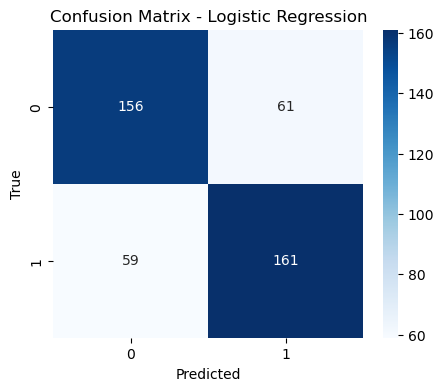

Confusion Matrix for Decision Tree:
 [[202  15]
 [  9 211]]

Classification Report for Decision Tree:
               precision    recall  f1-score   support

           0       0.96      0.93      0.94       217
           1       0.93      0.96      0.95       220

    accuracy                           0.95       437
   macro avg       0.95      0.94      0.95       437
weighted avg       0.95      0.95      0.95       437



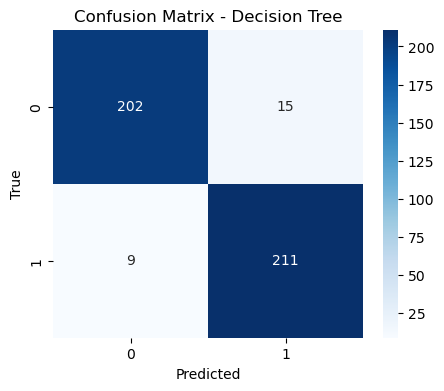

Confusion Matrix for Naive Bayes:
 [[139  78]
 [ 44 176]]

Classification Report for Naive Bayes:
               precision    recall  f1-score   support

           0       0.76      0.64      0.69       217
           1       0.69      0.80      0.74       220

    accuracy                           0.72       437
   macro avg       0.73      0.72      0.72       437
weighted avg       0.73      0.72      0.72       437



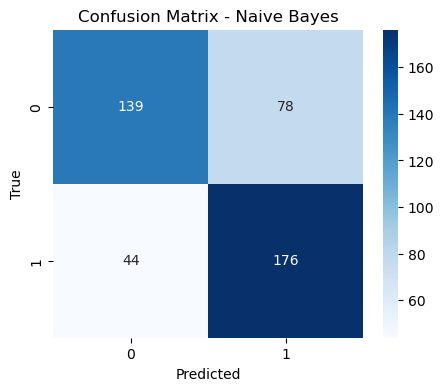

Confusion Matrix for Random Forest:
 [[206  11]
 [ 11 209]]

Classification Report for Random Forest:
               precision    recall  f1-score   support

           0       0.95      0.95      0.95       217
           1       0.95      0.95      0.95       220

    accuracy                           0.95       437
   macro avg       0.95      0.95      0.95       437
weighted avg       0.95      0.95      0.95       437



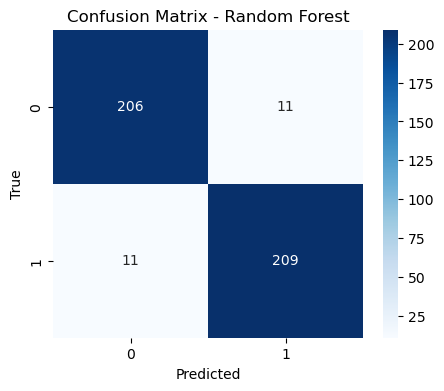

Confusion Matrix for XGBoost:
 [[203  14]
 [ 11 209]]

Classification Report for XGBoost:
               precision    recall  f1-score   support

           0       0.95      0.94      0.94       217
           1       0.94      0.95      0.94       220

    accuracy                           0.94       437
   macro avg       0.94      0.94      0.94       437
weighted avg       0.94      0.94      0.94       437



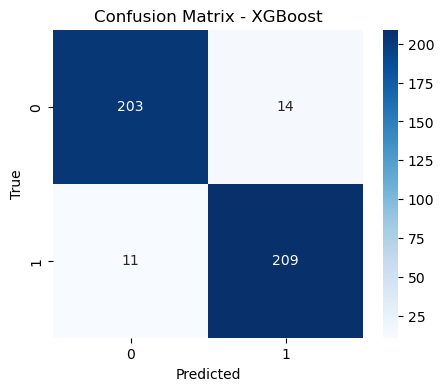

In [46]:
print_metrics(y_test, y_pred_logreg, "Logistic Regression")
print_metrics(y_test, y_pred_dtree, "Decision Tree")
print_metrics(y_test, y_pred_nb, "Naive Bayes")
print_metrics(y_test, y_pred_rf, "Random Forest")
print_metrics(y_test, y_pred_xgb, "XGBoost")

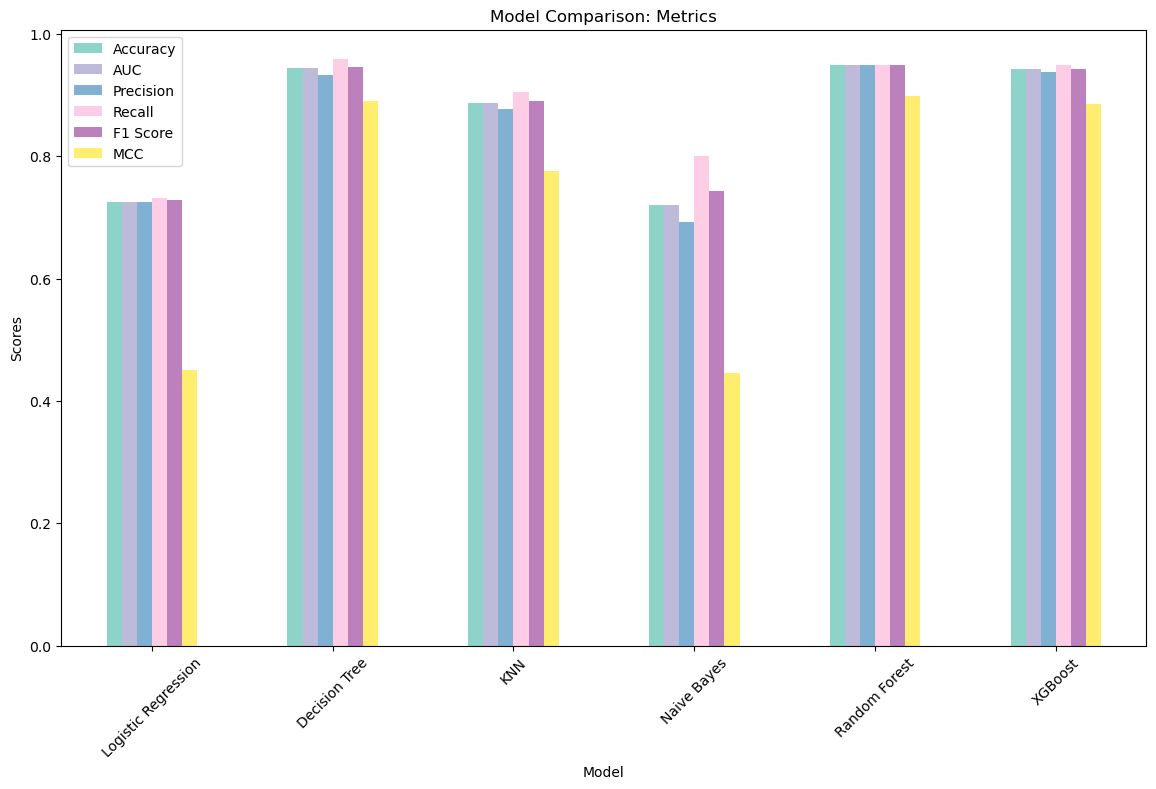

                 Model  Accuracy       AUC  Precision    Recall  F1 Score  \
0  Logistic Regression  0.725400  0.725356   0.725225  0.731818  0.728507   
1        Decision Tree  0.945080  0.944983   0.933628  0.959091  0.946188   
2                  KNN  0.887872  0.887757   0.876652  0.904545  0.890380   
3          Naive Bayes  0.720824  0.720276   0.692913  0.800000  0.742616   
4        Random Forest  0.949657  0.949654   0.950000  0.950000  0.950000   
5              XGBoost  0.942792  0.942742   0.937220  0.950000  0.943567   

        MCC  
0  0.450759  
1  0.890470  
2  0.776082  
3  0.446475  
4  0.899309  
5  0.885651  


In [47]:
# Convert to DataFrame for better visualization
metrics_df = pd.DataFrame(models)

# **1. Bar Plot Comparing Metrics**
# Plotting the metrics for each model using seaborn and matplotlib
metrics_df.set_index('Model').plot(kind='bar', figsize=(14, 8), colormap="Set3")
plt.title('Model Comparison: Metrics')
plt.ylabel('Scores')
plt.xticks(rotation=45)
plt.show()

# Print the evaluation metrics for all models
print(metrics_df)



| **Model** | **Accuracy** | **AUC** | **Precision** | **Recall** | **F1 Score** |
|------------|-------------|---------|--------------|------------|--------------|
| Logistic Regression | 0.725 | 0.725 | 0.725 | 0.732 | 0.729 |
| Decision Tree | 0.945 | 0.945 | 0.934 | 0.959 | 0.946 |
| KNN | 0.888 | 0.888 | 0.877 | 0.905 | 0.890 |
| Naive Bayes | 0.721 | 0.720 | 0.693 | 0.800 | 0.743 |
| Random Forest | 0.950 | 0.950 | 0.950 | 0.950 | 0.950 |
| XGBoost | 0.943 | 0.943 | 0.937 | 0.950 | 0.944 |

## 📌 Observations on Model Performance

| **Model** | **Observation about Model Performance** |
|------------|------------------------------------------|
| Logistic Regression | Logistic Regression achieved moderate performance (~72.5% accuracy). As a linear model, it may not capture complex non-linear relationships in the dataset, leading to comparatively lower predictive power. |
| Decision Tree | Decision Tree performed exceptionally well (94.5% accuracy) with very high recall (0.959), meaning it correctly identifies most positive cases. However, single trees can sometimes overfit the training data. |
| KNN | KNN showed strong performance (88.8% accuracy) with balanced precision and recall. It performs well when data is properly scaled but may become computationally expensive for larger datasets. |
| Naive Bayes | Naive Bayes achieved lower performance (~72% accuracy). This may be due to its assumption that features are independent, which is often not true in medical datasets where variables are correlated. |
| Random Forest | Random Forest achieved the best overall performance (95% accuracy, precision, recall, and F1 score). It effectively reduces overfitting by combining multiple decision trees and provides strong generalization. |
| XGBoost | XGBoost also performed extremely well (94.3% accuracy) with high recall (0.95). It captures complex non-linear patterns efficiently and generalizes well, making it suitable for deployment. |
